In [1]:
print(verstappen_laps.columns)

NameError: name 'verstappen_laps' is not defined

req         WARNING 	DEFAULT CACHE ENABLED! (734.18 MB) C:\Users\kumar\AppData\Local\Temp\fastf1
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control

   LapNumber                   Time  Position                LapTime
0        1.0 0 days 01:13:34.222000      12.0 0 days 00:01:39.161000
1        2.0 0 days 01:15:01.356000      10.0 0 days 00:01:27.134000
2        3.0 0 days 01:16:27.596000      10.0 0 days 00:01:26.240000
3        4.0 0 days 01:17:54.298000      10.0 0 days 00:01:26.702000
4        5.0 0 days 01:19:19.692000       9.0 0 days 00:01:25.394000
    Lap  Previous Position  New Position               Lap Time
0   2.0               12.0          10.0 0 days 00:01:27.134000
1   5.0               10.0           9.0 0 days 00:01:25.394000
2   6.0                9.0           8.0 0 days 00:01:24.311000
3  10.0                8.0           7.0 0 days 00:01:24.015000
4  11.0                7.0           6.0 0 days 00:01:24.156000
5  24.0                6.0           5.0 0 days 00:01:24.530000
6  28.0                5.0           4.0 0 days 00:01:51.717000
7  29.0                4.0           2.0 0 days 00:01:45.014000
8  43.0   

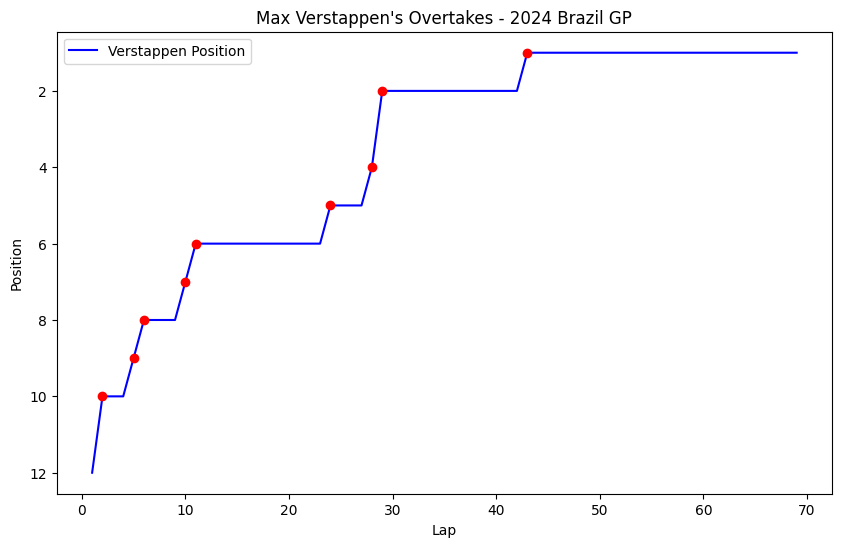

In [2]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd

race = fastf1.get_session(2024, 'Brazil', 'R')


race.load()

laps = race.laps

verstappen_laps = laps[laps['Driver'] == 'VER']

print(verstappen_laps[['LapNumber', 'Time', 'Position', 'LapTime']].head())


verstappen_positions = verstappen_laps[['LapNumber', 'Position', 'LapTime']]


verstappen_overtakes = []
for i in range(1, len(verstappen_positions)):
    if verstappen_positions.iloc[i]['Position'] < verstappen_positions.iloc[i-1]['Position']:
        verstappen_overtakes.append({
            'Lap': verstappen_positions.iloc[i]['LapNumber'],
            'Previous Position': verstappen_positions.iloc[i-1]['Position'],
            'New Position': verstappen_positions.iloc[i]['Position'],
            'Lap Time': verstappen_positions.iloc[i]['LapTime']
        })


overtakes_df = pd.DataFrame(verstappen_overtakes)


print(overtakes_df)


plt.figure(figsize=(10, 6))


plt.plot(verstappen_positions['LapNumber'], verstappen_positions['Position'], label='Verstappen Position', color='blue')


for _, overtake in overtakes_df.iterrows():
    plt.plot(overtake['Lap'], overtake['New Position'], 'ro')  # Red dots for overtakes

plt.gca().invert_yaxis()  # Invert y-axis since lower positions are better (1 is first)
plt.xlabel('Lap')
plt.ylabel('Position')
plt.title("Max Verstappen's Overtakes - 2024 Brazil GP")
plt.legend()

plt.show()